In [1]:
import pandas as pd

Задание 1

In [2]:
url='https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url, encoding= 'unicode_escape')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Задание 2

In [17]:
print(df.satisfaction_level.describe())
print(f'Медиана: {df.satisfaction_level.median()}')
print(f'Мода: {df.satisfaction_level.mode()[0]}')

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64
Медиана: 0.64
Мода: 0.1


In [18]:
print(df.last_evaluation.describe())
print(f'Медиана: {df.last_evaluation.median()}')
print(f'Мода: {df.last_evaluation.mode()[0]}')

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64
Медиана: 0.72
Мода: 0.55


In [19]:
print(df.number_project.describe())
print(f'Медиана: {df.number_project.median()}')
print(f'Мода: {df.number_project.mode()[0]}')

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64
Медиана: 4.0
Мода: 4


In [20]:
print(df.average_montly_hours.describe())
print(f'Медиана: {df.average_montly_hours.median()}')
print(f'Мода: {df.average_montly_hours.mode()[0]}')

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64
Медиана: 200.0
Мода: 135


In [21]:
print(df.time_spend_company.describe())
print(f'Медиана: {df.time_spend_company.median()}')
print(f'Мода: {df.time_spend_company.mode()[0]}')

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64
Медиана: 3.0
Мода: 3


Задание 3

In [23]:
corr = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<b>Определите две самые скоррелированные и две наименее скоррелированные переменные.</b></br>
Две наиболее скореллериванные перменные это number_project и average_montly_hours.</br>
Две наименее скоррелированные переменные это average_montly_hours и satisfaction_level

Задание 4

In [25]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Задание 5

In [80]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='Зарплата', ylabel='Кол-во сотрудников'>

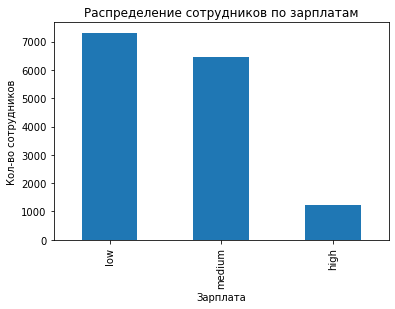

In [81]:
df.salary.value_counts().plot(kind = 'bar',title = 'Распределение сотрудников по зарплатам',\
                              xlabel = 'Зарплата', ylabel = 'Кол-во сотрудников' )

Задание 6

In [65]:
df1 = df[['department','salary']].value_counts().rename_axis(['department','salary']).to_frame('counts')

In [71]:
df1 = df1.sort_values(by='department')

In [79]:
df1.unstack()

counts             
salary        high   low medium
department                     
IT              83   609    535
RandD           51   364    372
accounting      74   358    335
hr              45   335    359
management     225   180    225
marketing       80   402    376
product_mng     68   451    383
sales          269  2099   1772
support        141  1146    942
technical      201  1372   1147

<AxesSubplot:xlabel='department'>

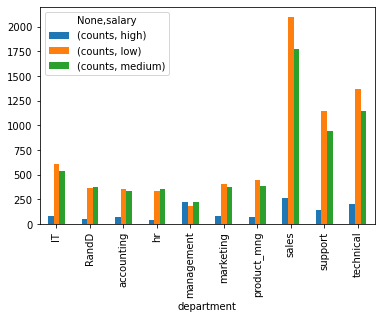

In [83]:
df1.unstack().plot(kind = 'bar')

Задание 7

In [92]:
A = df.average_montly_hours.loc[df.salary == 'high']
B = df.average_montly_hours.loc[df.salary == 'low']

In [93]:
A,B

(72       149
 111      289
 189      156
 267      129
 306      149
         ... 
 14829    148
 14868    130
 14902    159
 14941    131
 14980    238
 Name: average_montly_hours, Length: 1237, dtype: int64,
 0        157
 3        223
 4        159
 5        153
 6        247
         ... 
 14994    151
 14995    160
 14996    143
 14997    280
 14998    158
 Name: average_montly_hours, Length: 7316, dtype: int64)

In [96]:
from scipy import stats
f,p = stats.ttest_ind(A,B)
f,p
if (p < 0.01):
    print('Отвергаем нулевую гипотезу, время работы сотрудников не одинаково')
else:
    print('Принимаем нулевую гипотезу, время работы сотрудников одинаково')

Принимаем нулевую гипотезу, время работы сотрудников одинаково


Задание 8

In [101]:
emp_all = len(df)

In [114]:
emp_promotion_last_5years_left = len(df.loc[(df.promotion_last_5years == 1) & (df.left == 1)])
emp_promotion_last_5years_work = len(df.loc[(df.promotion_last_5years == 1) & (df.left == 0)])

In [124]:
print(f'Доля сотрудников уволившихся после повышения: {round((emp_promotion_last_5years_left/emp_all) * 100,2)}%')
print(f'Доля сотрудников не уволившихся после повышения: {round((emp_promotion_last_5years_work/emp_all) * 100,2)}%')

Доля сотрудников уволившихся после повышения: 0.13%
Доля сотрудников не уволившихся после повышения: 2.0%


In [122]:
emp_satisfaction = df.groupby(df['left'] == 1)['satisfaction_level'].mean().round(2)

In [130]:
print(f'Средняя степень удовлетворенности уволенных: {emp_satisfaction[0]}')
print(f'Средняя степень удовлетворенности работающих: {emp_satisfaction[1]}')

Средняя степень удовлетворенности уволенных: 0.67
Средняя степень удовлетворенности работающих: 0.44


In [131]:
emp_project = df.groupby(df['left'] == 1)['number_project'].mean().round(2)

In [133]:
print(f'Среднее количество проектов у уволенных: {emp_project[0]}')
print(f'Среднее количество проектов у работающих: {emp_project[1]}')

Среднее количество проектов у уволенных: 3.79
Среднее количество проектов у работающих: 3.86


Задание 9

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [143]:
df2 = df.drop(['left','department','salary'], axis=1)
y = df.left

In [144]:
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [147]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3, random_state = 42)

In [150]:
lr = LinearDiscriminantAnalysis()

In [151]:
lr.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [152]:
y_pred = lr.predict(X_test)

In [153]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
accuracy_score(y_test, y_pred)
# точность модели

0.7557777777777778

In [161]:
X_test['predict'] = y_pred 
X_test['test'] = y_test
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,predict,test
6723,0.65,0.96,5,226,2,1,0,0,0
6473,0.88,0.80,3,166,2,0,0,0,0
4679,0.69,0.98,3,214,2,0,0,0,0
862,0.41,0.47,2,154,3,0,0,0,1
7286,0.87,0.76,5,254,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...
13388,0.85,0.81,4,260,3,0,0,0,0
10463,0.21,0.43,2,249,3,0,0,1,0
5331,0.78,0.53,3,156,3,0,0,0,0
7499,0.93,0.58,5,238,2,0,0,0,0


In [162]:
confusion_matrix(y_test, y_pred)

array([[3138,  290],
       [ 809,  263]], dtype=int64)

3138 модель рассчитала что останутся, 263 что уволятся. При поэтом ошиблась в 809 случаях, что люди уволятся и в 290, что сотрудники останутся.